In [1]:
import pandas as pd
import numpy as np
from fastai.core import *
from PIL import Image
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from torchvision.models import *

In [2]:
import json
from collections import defaultdict
import pdb
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [119]:
coco = Path('dataset')
# coco = untar_data('classroomtest.coco.zip')
img_dir = Path('dataset/image')
annotations_train = Path('dataset/annotation/train_annotations.coco.json')
annotations_test = Path('dataset/annotation/test_annotations.coco.json')

# annotation 여기에선 데이터 한꺼번에 불러오길래
# train val images 합쳐서 넣음
images, lbl_bbox = get_annotations(annotations_train)
images_,lbl_bbox_ = get_annotations(annotations_test)
images.extend(images_)
lbl_bbox.extend(lbl_bbox_)


In [5]:
# with open(annotations_train) as f:
#     train_json = json.load(f)
    
# ncat = len(train_json['categories'])
# train_json['categories']

In [6]:
for idx, lbl in enumerate(lbl_bbox):
    if len(lbl[1]) == 0:
        print(f"found empty annotation: {idx}")

In [51]:
## 돌렸을때 경고문구는 원래그럼. 예제에도 있었음.

img_list = ImageList.from_folder(img_dir)
#image size
sz = 224
# print(len(img_list))

img2bbox = dict(zip(images, lbl_bbox))
# img2bbox.sort()
print(type(images))
# cnt = 0
def get_y_func(o):
    filename = o.name
    if img2bbox.get(o.name):
        return img2bbox[o.name]
    else:
        # 데이터가 다 잘 들어간걸 확인했는데도 자꾸 오류가 나서 넣은 코드
        # 라벨링이 안된 사진이 들어갔을때 나는 오류라서
        # 임의로 bbox 리턴. 데이터 교체하면 오류 없을것.
        return [[[128, 148, 290, 217.5], [152, 162, 170.5, 178]], ['4', 'eye_opened']]

data =(ObjectItemList.from_folder('dataset/image')
       .split_by_folder())

# 왜인진모르겠지만 테스트셋이 자동으로 안들어가서 일부러 넣어줌
# 지금은 test 셋 쓸일 없음
# data.test = ObjectItemList.from_folder('dataset/image/test')
data
# data = data.label_from_func(get_y_func)
data = (ObjectItemList.from_folder('dataset/image')
        .split_by_folder()                          
        .label_from_func(get_y_func)
        .transform(get_transforms(), tfm_y=True, size=224)
        .databunch(bs=8, collate_fn=bb_pad_collate, num_workers=0)
        .normalize(imagenet_stats)
        ) 
data

<class 'list'>


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


ImageDataBunch;

Train: LabelList (45 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: dataset\image;

Valid: LabelList (13 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: dataset\image;

Test: None

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


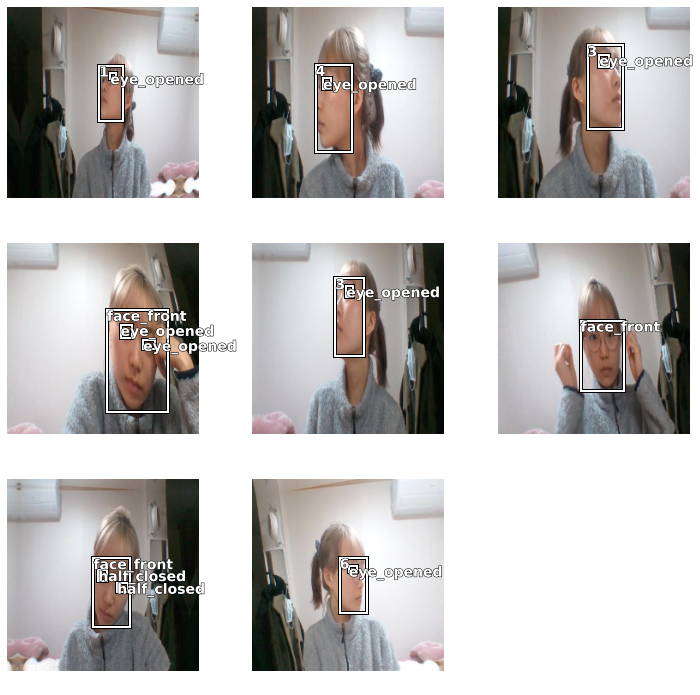

In [52]:
data.show_batch(rows=3, ds_type=DatasetType.Train, figsize=(10,10))

In [42]:
# images[3] 이미지 이름
# img_list[5] 이미지 파일

# face_fron -> 5  :수정
data.train_ds.y.classes

['background',
 '1',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'eye_closed',
 'eye_opened',
 'face_front',
 'half_closed']

In [58]:
for idx, lbl in enumerate(lbl_bbox):
    if len(lbl[1]) == 0:
        print(f"found empty annotation: {idx}")

        
with open(annotations_train) as f:
    train_json = json.load(f)

ncat = len(train_json['categories'])
train_json['categories']
# custom_head= 만들면 최고....

[{'id': 0, 'name': 'face', 'supercategory': 'none'},
 {'id': 1, 'name': '1', 'supercategory': 'face'},
 {'id': 2, 'name': '2', 'supercategory': 'face'},
 {'id': 3, 'name': '3', 'supercategory': 'face'},
 {'id': 4, 'name': '4', 'supercategory': 'face'},
 {'id': 5, 'name': '5', 'supercategory': 'face'},
 {'id': 6, 'name': '6', 'supercategory': 'face'},
 {'id': 7, 'name': '7', 'supercategory': 'face'},
 {'id': 8, 'name': '8', 'supercategory': 'face'},
 {'id': 9, 'name': '9', 'supercategory': 'face'},
 {'id': 10, 'name': 'eye_closed', 'supercategory': 'face'},
 {'id': 11, 'name': 'eye_opened', 'supercategory': 'face'},
 {'id': 12, 'name': 'face_front', 'supercategory': 'face'},
 {'id': 13, 'name': 'half_closed', 'supercategory': 'face'}]

In [53]:
epochs =3
max_lr = 0.2
learn = cnn_learner(data, models.resnet34)

learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# loss function 

In [80]:
itemno = 1
item = data.valid_ds[itemno][0]
x, y = data.one_item(item)
item, x, y

(Image (3, 224, 224),
 tensor([[[[-1.3644, -1.3792, -1.4063,  ...,  0.9265,  0.5954,  0.5707],
           [-1.3644, -1.3665, -1.4063,  ...,  0.8794,  0.6631,  0.6806],
           [-1.3302, -1.3610, -1.4234,  ...,  0.5358,  0.2622,  0.1407],
           ...,
           [-1.9809, -2.0765, -2.0850,  ...,  0.5926,  0.6491,  0.9341],
           [-1.9614, -2.0567, -2.0565,  ...,  0.6311,  0.8214,  1.2210],
           [-1.9295, -2.0251, -2.0247,  ...,  0.7267,  0.9808,  1.4098]],
 
          [[-1.1779, -1.1628, -1.1477,  ...,  0.9658,  0.8753,  1.0105],
           [-1.1779, -1.1758, -1.1477,  ...,  0.8791,  0.8773,  1.0275],
           [-1.1954, -1.1796, -1.1652,  ...,  0.4466,  0.3532,  0.3628],
           ...,
           [-1.6856, -1.7833, -1.8208,  ...,  0.2841,  0.3875,  0.7013],
           [-1.6656, -1.7630, -1.7882,  ...,  0.3824,  0.6617,  1.0849],
           [-1.6331, -1.7308, -1.7556,  ...,  0.5194,  0.8418,  1.3431]],
 
          [[-1.0550, -1.0550, -1.0550,  ...,  1.4103,  1.2631,  

In [83]:
b_bb, b_clas = learn.model(x)
idx = 0
b_clasi = b_clas[idx]
b_bboxi = b_bb[idx]
b_clasi.shape, b_bboxi.shape, b_clasi[0], b_bboxi[0]

(torch.Size([16, 15]),
 torch.Size([16, 4]),
 tensor([-0.4271,  0.2058,  0.5165, -1.6643,  1.1519, -0.2316,  1.2552, -0.4911,
         -0.4363, -0.3357,  0.6584, -0.6070,  0.0199,  1.3864, -1.3499],
        device='cuda:0', grad_fn=<SelectBackward>),
 tensor([ 0.1527,  0.6606, -1.2229,  0.2453], device='cuda:0',
        grad_fn=<SelectBackward>))

In [84]:
label = data.valid_ds[itemno][1]
bbox, clas = label.data
bbox = bbox.cuda()
clas = torch.tensor(clas).cuda()
bboxi = bbox
clasi = clas

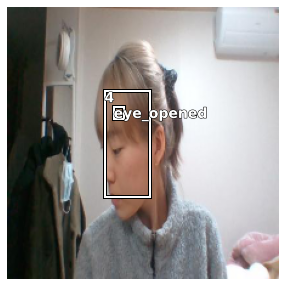

In [86]:
bboxi.shape, clasi.shape, bboxi, clasi
item.show(y=label, figsize=(5,5))

In [87]:
ncells = 4
k = 1 # num boxes per cell
first_ctr = -1 + 2/(2*ncells)
last_ctr  =  1 - 2/(2*ncells)
a_x = np.repeat(np.linspace(first_ctr, last_ctr, ncells), ncells)
a_y = np.tile(np.linspace(first_ctr, last_ctr, ncells), ncells)
a_sz = np.array([2/ncells for _ in a_x])
anchors = torch.tensor(np.stack([a_x, a_y, a_sz, a_sz], axis=1)).type(torch.FloatTensor).cuda()
anchors

tensor([[-0.7500, -0.7500,  0.5000,  0.5000],
        [-0.7500, -0.2500,  0.5000,  0.5000],
        [-0.7500,  0.2500,  0.5000,  0.5000],
        [-0.7500,  0.7500,  0.5000,  0.5000],
        [-0.2500, -0.7500,  0.5000,  0.5000],
        [-0.2500, -0.2500,  0.5000,  0.5000],
        [-0.2500,  0.2500,  0.5000,  0.5000],
        [-0.2500,  0.7500,  0.5000,  0.5000],
        [ 0.2500, -0.7500,  0.5000,  0.5000],
        [ 0.2500, -0.2500,  0.5000,  0.5000],
        [ 0.2500,  0.2500,  0.5000,  0.5000],
        [ 0.2500,  0.7500,  0.5000,  0.5000],
        [ 0.7500, -0.7500,  0.5000,  0.5000],
        [ 0.7500, -0.2500,  0.5000,  0.5000],
        [ 0.7500,  0.2500,  0.5000,  0.5000],
        [ 0.7500,  0.7500,  0.5000,  0.5000]], device='cuda:0')

In [88]:
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
anchor_cnr

tensor([[-1.0000, -1.0000, -0.5000, -0.5000],
        [-1.0000, -0.5000, -0.5000,  0.0000],
        [-1.0000,  0.0000, -0.5000,  0.5000],
        [-1.0000,  0.5000, -0.5000,  1.0000],
        [-0.5000, -1.0000,  0.0000, -0.5000],
        [-0.5000, -0.5000,  0.0000,  0.0000],
        [-0.5000,  0.0000,  0.0000,  0.5000],
        [-0.5000,  0.5000,  0.0000,  1.0000],
        [ 0.0000, -1.0000,  0.5000, -0.5000],
        [ 0.0000, -0.5000,  0.5000,  0.0000],
        [ 0.0000,  0.0000,  0.5000,  0.5000],
        [ 0.0000,  0.5000,  0.5000,  1.0000],
        [ 0.5000, -1.0000,  1.0000, -0.5000],
        [ 0.5000, -0.5000,  1.0000,  0.0000],
        [ 0.5000,  0.0000,  1.0000,  0.5000],
        [ 0.5000,  0.5000,  1.0000,  1.0000]], device='cuda:0')

In [89]:
grid_sizes = torch.tensor(np.array([2/ncells]), requires_grad=False).type(torch.FloatTensor).unsqueeze(1).cuda()
grid_sizes

tensor([[0.5000]], device='cuda:0')

In [90]:
def intersect(box_a, box_b):
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

def jaccard(box_a, box_b):
    inter = intersect(box_a, box_b)
    union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
    return inter / union

def map_to_ground_truth(overlaps, print_it=False):
    prior_overlap, prior_idx = overlaps.max(1)
    if print_it: print(prior_overlap)
#     pdb.set_trace()
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap,gt_idx

def actn_to_bb(actn, anchors):
    actn_bbs = torch.tanh(actn)
    actn_centers = (actn_bbs[:,:2]/2 * grid_sizes) + anchors[:,:2]
    actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
    return hw2corners(actn_centers, actn_hw)

def corners2hw(corners): return torch.cat([corners[:,:2], corners[:,2:] - corners[:,:2]], dim=1)
def show_results(max_show=0, printit=False):
    if max_show == 0:
        max_show = len(data.valid_ds)
    else:
        max_show = min(max_show, len(data.valid_ds))
    figsize = (10, max_show*5)
    fig,axs = plt.subplots(max_show, 2, figsize=figsize)
    i = 0
    while i < max_show:
        img, label = data.valid_ds[i]
        img.show(ax=axs[i,0], y=label, figsize=(5,5))        
        x, y = data.one_item(img)
        pred_bb, pred_cc = learn.model(x)
        pred_cc = pred_cc.squeeze() # remove the singleton batch dimension
        pred_bb = pred_bb.squeeze()
        pred_clas = pred_cc.max(1)[1] # get the index of the max as the predicted clas
        pred_clas_prob = pred_cc.max(1)[0].sigmoid() # get the sigmoid of the max as the class probability
        pos_idx = pred_clas > 0
#         if i == 1:
#             pdb.set_trace()
        a_ic = actn_to_bb(pred_bb, anchors)
        anc_cnr = anchor_cnr.clone()
        if printit:
            print(f"i={i}, a_ic orig")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor orig")
            print(anc_cnr[pos_idx])
        h = 224
        w = 224
        # convert to image coordinates (add 1 and scale by img size)
        a_ic.add_(1)
        anc_cnr.add_(1)
        if printit:
            print(f"i={i}, a_ic moved")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor moved")
            print(anc_cnr[pos_idx])        
        a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        if printit:
            print(f"i={i}, a_ic rescaled")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor rescaled")
            print(anc_cnr[pos_idx])
        # select only bboxes that detect something else than background (0)
        pos_pred_clas = pred_clas[pos_idx]
        pos_a_ic = a_ic[pos_idx]
        if len(pos_pred_clas) > 0:
#             if i == 1:
#                 pdb.set_trace()
            pred_label = ImageBBox.create(224, 224, pos_a_ic.cpu(), pos_pred_clas.cpu(), data.train_ds.y.classes)
            img.show(ax=axs[i,1], y=pred_label, figsize=(5,5))
        else:
            img.show(ax=axs[i,1], figsize= (5,5))
        i = i+1
        

#     i
#     while i < max_show:
#     for i,(x,y) in enumerate(data.one_batch(ds_type=DatasetType.Valid)):
#         if i >= max_show:
#             break
#         x.show(ax=axs[i,0], y=y, figsize=(5,5))
#         pred = learn.model(x)
#         #pred.show(ax=axs[i,2], figsize=(5,5), title=f"recall: {r:.2f}, precision: {p:.2f}")

In [93]:
# computer jaccard index for each pair of bbox / anchor box
overlaps = jaccard(bbox.data.cuda(), anchor_cnr)
gt_overlap, gt_idx = map_to_ground_truth(overlaps)
gt_overlap, gt_idx

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.9900, 0.0357, 0.0000, 0.0000,
         1.9900, 0.0366, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        device='cuda:0'),
 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'))

In [100]:
gt_clas = clas[gt_idx]
gt_clas = gt_clas.long()

In [101]:
thresh = 0.5
pos = gt_overlap > thresh
pos_idx = torch.nonzero(pos)[:,0]
neg_idx = torch.nonzero(~pos)[:,0]

a_ic = actn_to_bb(b_bboxi, anchors)
gt_bbox = bbox.cuda()[gt_idx]
loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
clas_loss  = F.cross_entropy(b_clasi, gt_clas)
loc_loss,clas_loss

(tensor(0.3404, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(3.4647, device='cuda:0', grad_fn=<NllLossBackward>))

In [102]:
a_ic[pos_idx] - gt_bbox[pos_idx]

tensor([[-0.2064, -0.3441,  0.4455,  0.2609],
        [ 0.7085, -0.4577,  0.2359, -0.0640]], device='cuda:0',
       grad_fn=<SubBackward0>)

In [103]:
def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels.data.cpu()]

class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

    def forward(self, pred, targ):
        t = one_hot_embedding(targ, self.num_classes+1)
#         t = t[:,:-1].contiguous().cuda()
#         x = pred[:,:-1]
        # in fastai v1, the background is encoded as the first class, rather than the last one
        t = t[:,1:].contiguous().cuda()
        x = pred[:,1:]
        w = self.get_weight(x,t)
        return F.binary_cross_entropy_with_logits(x, t, w, size_average=False)/self.num_classes
    
    def get_weight(self,x,t): return None

loss_f = BCE_Loss(ncat)

In [104]:
# remove padding - images in a minibatch will have a different number of objects
# those with fewer objects will have their bbox groundtruth tensor padded with 0s
def get_y(bbox,clas):
    bbox = bbox.view(-1,4)
    bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
    return bbox[bb_keep],clas[bb_keep]

def ssd_1_loss(pred_bbox,pred_clas,bbox,clas):
    bbox,clas = get_y(bbox,clas)
    if len(bbox) == 0 and len(clas) == 0:
        return 0.0, 0.0
    a_ic = actn_to_bb(pred_bbox, anchors)
    overlaps = jaccard(bbox.data, anchor_cnr.data)
    gt_overlap,gt_idx = map_to_ground_truth(overlaps,False)
    gt_clas = clas[gt_idx]
    pos = gt_overlap > 0.4
    pos_idx = torch.nonzero(pos)[:,0]
    gt_clas[~pos] = 0 # background coded as 0
    gt_bbox = bbox[gt_idx]
    loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
    clas_loss  = loss_f(pred_clas, gt_clas)
    #print(f"loc_loss: {loc_loss}, clas_loss: {clas_loss}")
    return loc_loss, clas_loss

def ssd_loss(pred,targ_bb,targ_c):
    lcs,lls = 0.,0.
#    i = 1
#    for b_c,b_bb,bbox,clas in zip(*pred,targ_bb,targ_c):
    for pr_bb, pr_c, ta_bb, ta_c in zip(*pred, targ_bb, targ_c):
#         print(f"item {i}")
#         if i == 5:
#             pdb.set_trace()
#         i = i+1
#        loc_loss,clas_loss = ssd_1_loss(b_c,b_bb,bbox,clas)
        loc_loss, clas_loss = ssd_1_loss(pr_bb, pr_c, ta_bb, ta_c)
        lls += loc_loss
        lcs += clas_loss
#    if print_it: print(f'loc: {lls.data[0]}, clas: {lcs.data[0]}')
    return 20*lls+lcs

In [110]:
class StdConv(nn.Module):
    def __init__(self, nin, nout, stride=2, drop=0.1):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(nout)
        self.drop = nn.Dropout(drop)
        
    def forward(self, x): return self.drop(self.bn(F.relu(self.conv(x))))
    
def flatten_conv(x,k):
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs,-1,nf//k)

class OutConv(nn.Module):
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, 4*k, 3, padding=1) # first bboxes
        self.oconv2 = nn.Conv2d(nin, (ncat+1)*k, 3, padding=1) # than class labels
        self.oconv2.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k),
                flatten_conv(self.oconv2(x), self.k)]
    
class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(0.25)
        self.sconv0 = StdConv(512,256, stride=1)
#         self.sconv1 = StdConv(256,256)
        self.sconv2 = StdConv(256,256)
        self.out = OutConv(k, 256, bias)
        
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
#         x = self.sconv1(x)
        x = self.sconv2(x)
        return self.out(x)

epoch,train_loss,valid_loss,time
0,151.525681,#na#,00:01
1,152.150772,#na#,00:01
2,152.277802,#na#,00:01
3,152.740906,#na#,00:01
4,152.355484,#na#,00:01
5,151.916397,#na#,00:01
6,150.772354,#na#,00:01
7,149.338089,#na#,00:01
8,146.540329,#na#,00:01
9,141.347702,#na#,00:01


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

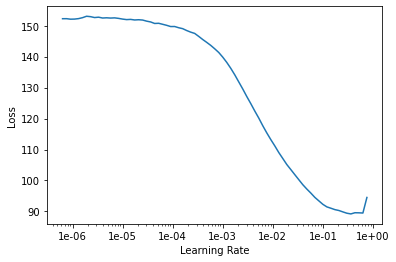

In [112]:
head_reg4 = SSD_Head(k=1, bias=-3.)
learn = cnn_learner(data, models.resnet34, loss_func=ssd_loss, custom_head=head_reg4)
lr_find(learn)
learn.recorder.plot()
learn.summary()


In [113]:
lr=3e-4
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,time
0,152.493835,118.824387,00:01
1,148.130417,103.846840,00:01
2,142.829651,89.925774,00:01
3,134.891205,77.236710,00:01
4,126.616615,67.657158,00:01
5,118.847206,61.042583,00:01
6,111.227257,55.273392,00:01
7,104.043686,53.273232,00:01
8,98.775467,53.779007,00:01
9,94.973976,55.220085,00:01


C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\

C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\selmo\.conda\envs\fastai-v\lib\site-packages\fastai

In [114]:
# loss function 바꿔도 됌!!!!!
learn.save('initial_model')
learn.export()

In [116]:
def corners2hw(corners): return torch.cat([corners[:,:2], corners[:,2:] - corners[:,:2]], dim=1)
def show_results(max_show=0, printit=False):
    if max_show == 0:
        max_show = len(data.valid_ds)
    else:
        max_show = min(max_show, len(data.valid_ds))
    figsize = (10, max_show*5)
    fig,axs = plt.subplots(max_show, 2, figsize=figsize)
    i = 0
    while i < max_show:
        img, label = data.valid_ds[i]
        img.show(ax=axs[i,0], y=label, figsize=(5,5))        
        x, y = data.one_item(img)
        pred_bb, pred_cc = learn.model(x)
        pred_cc = pred_cc.squeeze() # remove the singleton batch dimension
        pred_bb = pred_bb.squeeze()
        pred_clas = pred_cc.max(1)[1] # get the index of the max as the predicted clas
        pred_clas_prob = pred_cc.max(1)[0].sigmoid() # get the sigmoid of the max as the class probability
        pos_idx = pred_clas > 0
#         if i == 1:
#             pdb.set_trace()
        a_ic = actn_to_bb(pred_bb, anchors)
        anc_cnr = anchor_cnr.clone()
        if printit:
            print(f"i={i}, a_ic orig")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor orig")
            print(anc_cnr[pos_idx])
        h = 224
        w = 224
        # convert to image coordinates (add 1 and scale by img size)
        a_ic.add_(1)
        anc_cnr.add_(1)
        if printit:
            print(f"i={i}, a_ic moved")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor moved")
            print(anc_cnr[pos_idx])        
        a_ic.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        anc_cnr.mul_(torch.tensor([h/2, w/2, h/2, w/2]).cuda()).long()
        if printit:
            print(f"i={i}, a_ic rescaled")
            print(a_ic[pos_idx])
            print(f"i={i}, anchor rescaled")
            print(anc_cnr[pos_idx])
        # select only bboxes that detect something else than background (0)
        pos_pred_clas = pred_clas[pos_idx]
        pos_a_ic = a_ic[pos_idx]
        if len(pos_pred_clas) > 0:
#             if i == 1:
#                 pdb.set_trace()
            pred_label = ImageBBox.create(224, 224, pos_a_ic.cpu(), pos_pred_clas.cpu(), data.train_ds.y.classes)
            img.show(ax=axs[i,1], y=pred_label, figsize=(5,5))
        else:
            img.show(ax=axs[i,1], figsize= (5,5))
        i = i+1
        

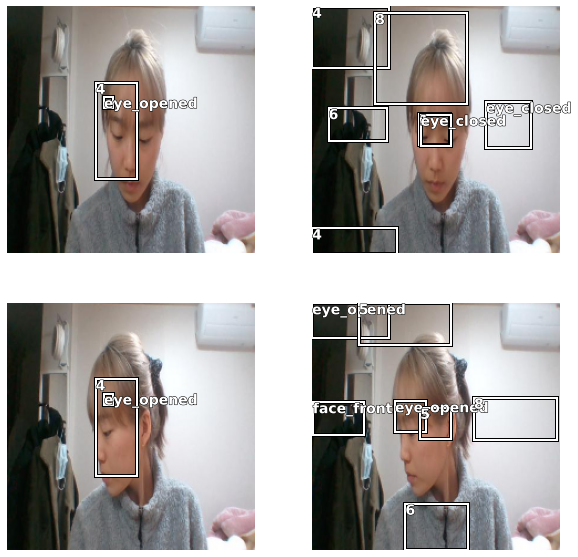

In [118]:
show_results(max_show=2, printit=False)

In [ ]:
# 대충 이어 붙이면 retinanet !

encoder = create_body(resnet34(), pretrained = TRUE)

arch = RetinaNet(encoder, get_c(dls), final_bias=-4)

ratios = c(1/2,1,2)
scales = c(1,2**(-1/3), 2**(-2/3))

crit = RetinaNetFocalLoss(scales = scales, ratios = ratios)

nn = nn()
